# Teste de Hipótese

### Desafio ONG | E.B.A - Estatística do Básico ao Avançado

Somos uma ONG de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.
```
- As pessoas desse experimento só verão 1 vídeo cada;
- Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal;
- As amostras são aleatórias e sem viéses sistematicos;
```
**Objetivo:** Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção.

**Experimento:** 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção.
Os vídeos são idênticos com exceção dos animais mostrados:
```
- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro
```

##### - Qual a chance de adotar um pet? (0-100) depois do vídeo?

##### - A média de probabilidade de quem vê o vídeo de gato é igual a de cachorro?

In [1]:
# Importação das bibliotecas para manipulação de tabelas (pandas), operações (numpy) e manipulação de gráficos (seaborn e matplotlib)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leitura do arquivo csv
df = pd.read_csv("cachorro_gato.csv")

In [3]:
# Visualização do arquivo
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


#### Coluna Grupo = 0 : Pessoas que viram o vídeo de cachorro
#### Coluna Grupo = 1 : Pessoas que viram o vídeo de gato
#### Coluna Escore : Probabilidade da pessoa adotar um pet após ver o vídeo

In [10]:
# Descrevendo as medidas de estatística descritiva da variável de interesse
df.groupby('grupo')['escore'].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
0,253.0,55.531922,14.665402,16.304739,44.488055,55.802372,66.249013,95.309459
1,247.0,56.744495,14.913287,14.654955,48.682432,56.924405,66.817326,93.259671


A média (56,74%) e mediana (56,92%) de escore do Grupo 1 (vídeo de gatos) são ligeiramente maiores do que a média (55,53%) e a mediana (55,80%) do Grupo 0 (vídeo de cachorros).

Apesar dos valores de média e mediana dos dois grupos estarem bem próximas, se faz necessária a aplicação de um teste de hipótese para definir se a média de escore de um dos vídeos é maior que o outro, ou se a média de escore em ambos os vídeos é estatisticamente igual.

### Definição das hipóteses

```
- Hipótese nula (H0): Média de escore vídeo de cachorros (0) = Média de escore vídeo de gatos (1)
```
```
- Hipótese alternativa (Ha): Média de escore vídeo de cachorros (0) ≠ Média de escore vídeo de gatos (1)
```


### Definição do nível de significância (alpha)
```
O nível de significância utilizado será de 5%
```

In [29]:
alpha = 0.05

### Escolha do teste de hipótese

Determinar a distribuição da variável de interesse é de suma importância para a escolha do teste de hipótese adequado.

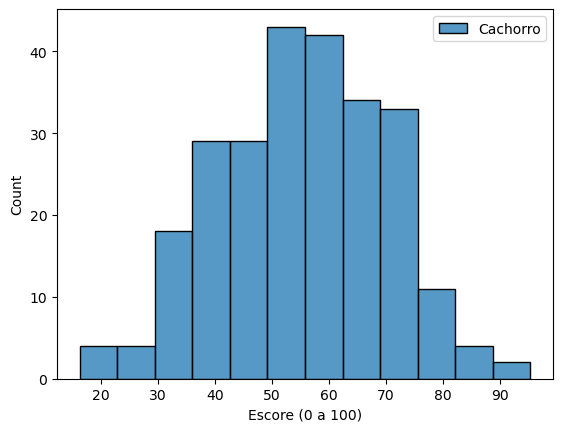

In [5]:
# Distribuição de escore das pessoas que viram o vídeo de cachorro
sns.histplot(df[df['grupo'] == 0]['escore'], label = "Cachorro")
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

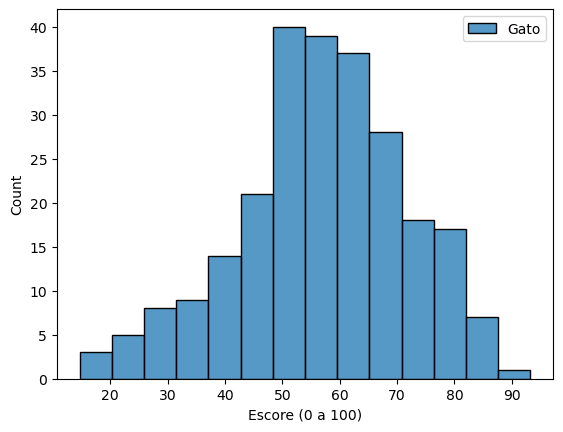

In [6]:
# Distribuição de escore das pessoas que viram o vídeo de gato
sns.histplot(df[df['grupo'] == 1]['escore'], label = "Gato")
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

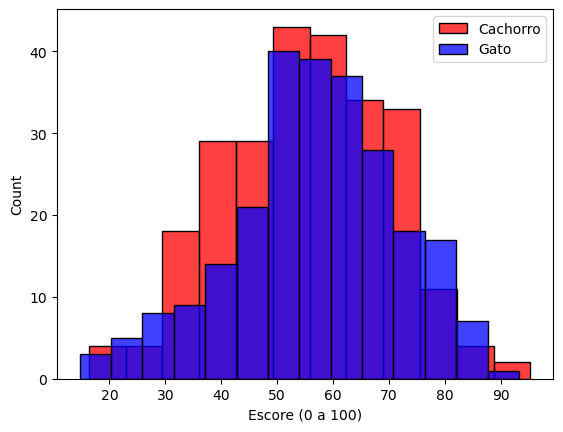

In [7]:
# Sobreposição das distribuições para comparação visual 
sns.histplot(df[df['grupo'] == 0]['escore'], label = "Cachorro", color = "red" )
sns.histplot(df[df['grupo'] == 1]['escore'], label = "Gato", color = "blue")
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

- Percebe-se que ambas as distribuições seguem uma normal, além de serem bastante semelhantes.
---
- As amostras foram selecionadas aleatoriamente.
---
- Trata-se de amostras independentes, onde as pessoas que viram o vídeo de cachorros (Grupo 0) viram apenas o vídeo de cachorros, assim como as pessoas do Grupo 1 viram apenas o vídeo de gatos.
---
- O desvio-padrão populacional é desconhecido.

#### Mediante essas características da amostra, o teste de hipótese mais adequado é o 
```
Teste t para duas amostras independentes
```

### Cálculo da estatística de teste e p-valor

In [11]:
# Importação da função que opera o teste t para amostras independentes
from scipy.stats import ttest_ind

In [24]:
# Cálculo da estatística de teste (statistic) e p-valor (pvalue)
ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

TtestResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083, df=498.0)

In [25]:
# Transformação e impressão dos valores com 3 casas decimais para melhor visualização dos resultados
t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


## Conclusão dos resultados

In [31]:
# Comparação do p-valor com o nível de significância (alpha)
if pvalue < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença estatisticamente significativa entre as médias dos grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias dos grupos são diferentes.")

Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias dos grupos são diferentes.


Portanto, com base nas evidências obtidas da amostra, concluímos que a probabilidade média de uma pessoa adotar um pet após ver o vídeo de gatos ou o vídeo de cachorros é a mesma.

## Propósito

Esta análise tem como objetivo concluir o Módulo 4 do curso E.B.A. - Estatística do Básico ao Avançado da Renata Biaggi, visando a aplicação de testes de hipóteses para validar os achados da análise exploratória.




## Autoria
-
Maryana Nascimento
